In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем данные

In [3]:
df = pd.read_csv('diamonds[1].csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Описание данных**

<code>'carat'</code> - вес бриллианта, в каратах <br>


<code>'cut'</code> - качество огранки <br>


<code>'color'</code> - цвет бриллианта <br>


<code>'clarity'</code> - степень чистоты бриллианта <br>


<code>'depth'</code> - глубина бриллианта, % <br>
    $ depth = \frac{2z}{\bar{x} + \bar{y}} $ <br>
    
    
<code>'table'</code> - плоская грань алмаза, видимая, когда камень лежит лицевой стороной вверх (площадка алмаза) <br>


<code>'price'</code> - цена, долл США <br>


<code>'x'</code> - длина, мм <br>


<code>'y'</code> - ширина, мм <br>


<code>'z'</code> - высота, мм <br>

Посмотрим основную информацию о данных и размер датасета

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Типы данных в норме, идем дальше

In [5]:
df.shape

(53940, 11)

Выведем описательные статистики по всему датасету

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


По описательным статистики можно заметить аномальные значения. Минимальные значения в столбцах x, y, z равны 0. Т.к. эти параметры отвечают за размер бриллианта, они не могут быть нулевыми, соответственно от этих данных необходимо избавиться


Кроме того, максимальные значения в столбцах y и z составляют достаточно большие значения по сравнению с максимальным значением x. Далее более детально рассмотрим этот момент

Избавимся от столбца с номером, он не понадобится нам для анализа

In [7]:
df = df.drop(df.columns[0], axis=1)

Проверим данные на наличие пропусков

In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропуски не обнаружены, теперь посмотрим, есть ли в данных дубликаты

In [9]:
df.loc[df.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


Удалим дубликаты

In [10]:
df = df.drop_duplicates()

Также можно заметить, что не все наши данные количественные, есть и категориальные. Посмотрим на уникальные значения в этих столбцах

In [11]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [13]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Столбцы <code>'cut'</code> и <code>'clarity'</code> представляют собой иерархию по качеству огранки и чистоте бриллианта, соответственно для кодирования значений в этих столбцах можно использовать метод *LabelEncoder* или мэппинг

Для кодирования значений в столбце <code>'color'</code> будем использовать фиктивные переменные

In [14]:
df.shape

(53794, 10)

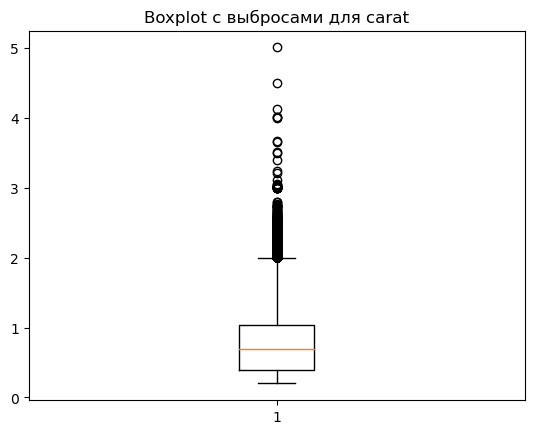

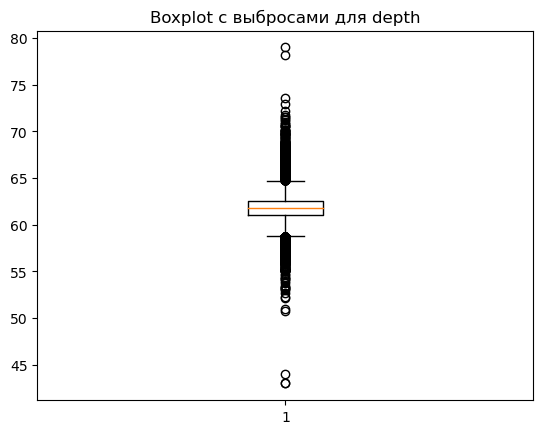

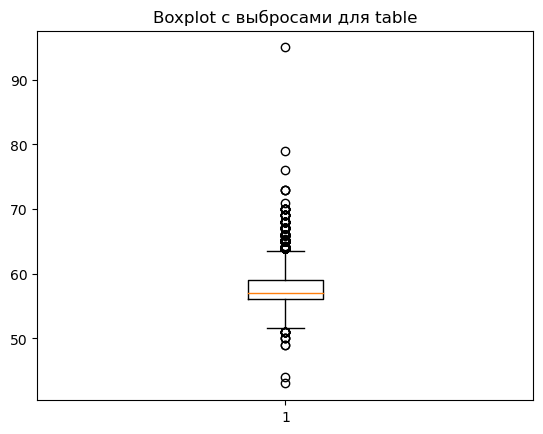

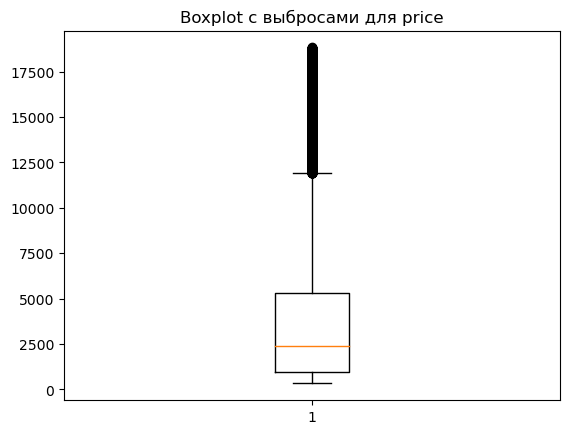

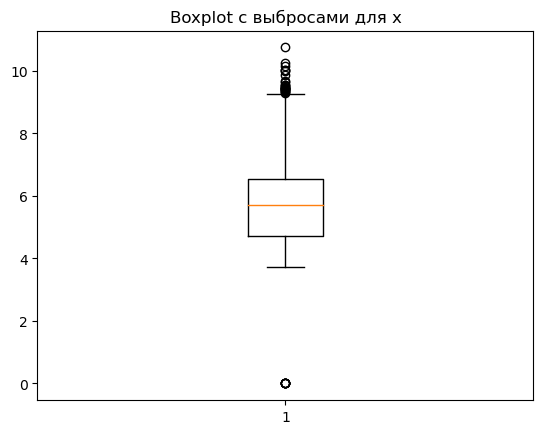

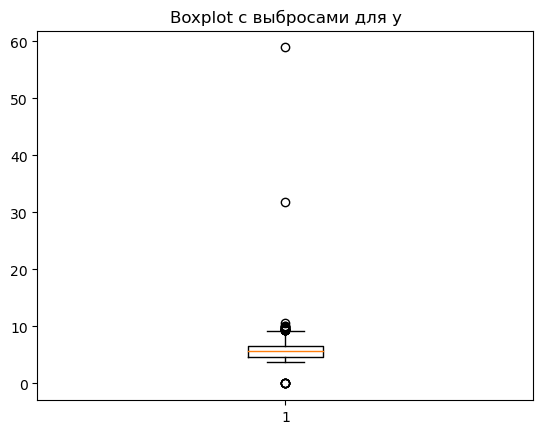

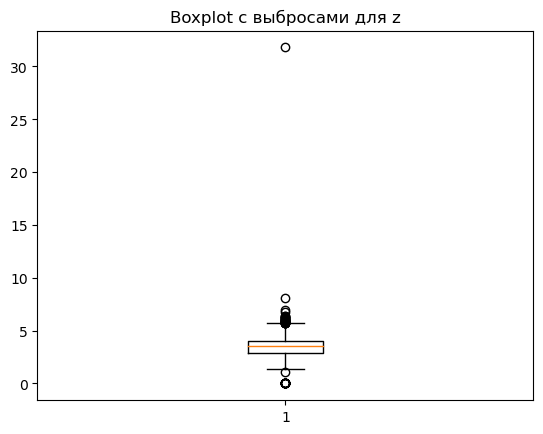

In [15]:
for column in df.columns:
    if df[column].dtype != 'object': 
        plt.figure() 
        plt.boxplot(df[column], showfliers=True) 
        plt.title('Boxplot с выбросами для {}'.format(column)) 
        plt.show()  

In [16]:
out_carat = df[df['carat'] > 3]
out_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
19339,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
22428,3.05,Premium,E,I1,60.9,58.0,10453,9.26,9.25,5.66
22540,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [17]:
out_depth = df[(df['depth'] < 45) & (df['depth'] > 75)]
out_depth

,carat,cut,color,clarity,depth,table,price,x,y,z


In [18]:
df = df[(df['depth'] > 45) & (df['depth'] < 75)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [19]:
out_table = df[(df['table'] < 50) & (df['table'] > 90)]
out_table

,carat,cut,color,clarity,depth,table,price,x,y,z


In [20]:
df = df[(df['table'] > 50) & (df['table'] < 90)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [22]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]

In [23]:
df = df[(df['x'] < 10) & (df['y'] < 30) & (df['z'] < 10)]

In [24]:
df.shape

(53754, 10)

**Анализ**

In [25]:
categorial = ['cut', 'clarity', 'color']

In [26]:
df_map = df.copy()

map_dict = {'Fair' : 0,
            'Good' : 1,
            'Very Good': 2,
            'Premium' : 3,
            'Ideal' : 4}
 
df_map['cut'] = df_map['cut'].map(map_dict)


map_dict1 = {'I1' : 0,
            'SI2' : 1,
            'SI1': 2,
            'VS2' : 3,
            'VS1' : 4,
            'VVS2' : 5, 
            'VVS1' : 6, 
            'IF' : 7}
 
df_map['clarity'] = df_map['clarity'].map(map_dict1)

In [27]:
df_encoded = pd.get_dummies(df_map)
df_encoded

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,2,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,0.72,1,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,0.70,2,2,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,0.86,3,1,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


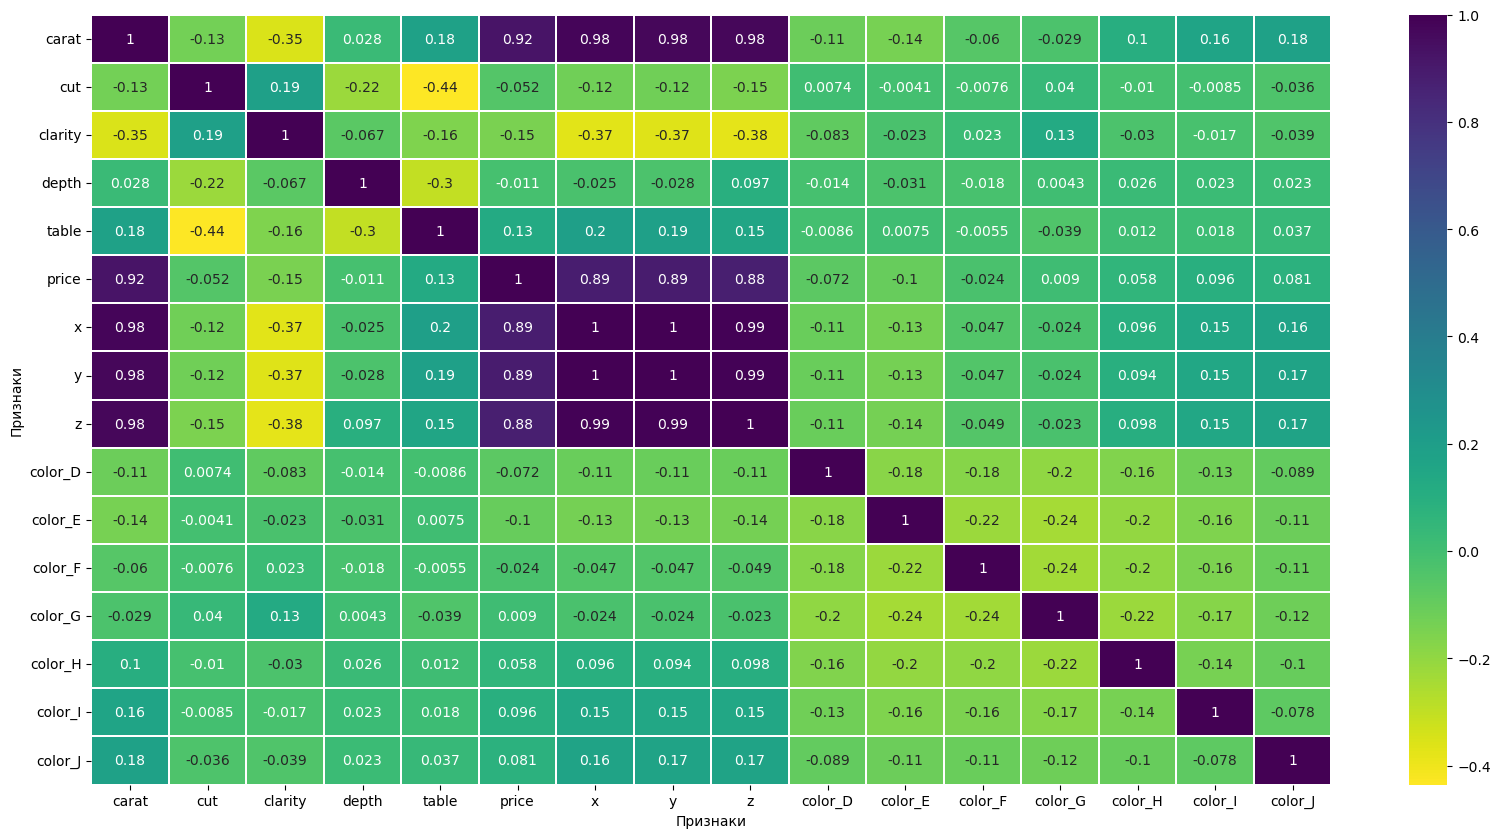

In [28]:
plt.figure(figsize = (20, 10))

ax = sns.heatmap(df_encoded.corr(), 
                 linewidth=0.1, 
                 linecolor='w', 
                 cmap='viridis_r', 
                 annot=True, 
                 fmt='.2g')

ax.set(ylabel="Признаки")
ax.set(xlabel="Признаки");

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_normalized = scaler.fit_transform(df_encoded)

df_normalized = pd.DataFrame(df_normalized, columns=df_encoded.columns)

df_normalized.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.202211,0.981825,-1.246706,-0.175038,-1.105374,-0.904575,-1.593550,-1.579789,-1.606235,-0.379081,2.121779,-0.463769,-0.514529,-0.426193,-0.334249,-0.234329
1,-1.244610,0.085293,-0.639391,-1.373026,1.592906,-0.904575,-1.647236,-1.705965,-1.780056,-0.379081,2.121779,-0.463769,-0.514529,-0.426193,-0.334249,-0.234329
2,-1.202211,-1.707769,0.575240,-3.416653,3.391759,-0.904324,-1.504072,-1.498675,-1.780056,-0.379081,2.121779,-0.463769,-0.514529,-0.426193,-0.334249,-0.234329
3,-1.075012,0.085293,-0.032075,0.459191,0.243766,-0.902566,-1.369856,-1.354473,-1.316534,-0.379081,-0.471303,-0.463769,-0.514529,-0.426193,2.991782,-0.234329
4,-1.032612,-1.707769,-1.246706,1.093420,0.243766,-0.902315,-1.244588,-1.246322,-1.142713,-0.379081,-0.471303,-0.463769,-0.514529,-0.426193,-0.334249,4.267503


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [31]:
X = df_normalized.drop(columns=['price'])

# Создание вектора целевой переменной y
y = df_normalized[['price']]

# Разделение данных на обучающий и тестовый наборы
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
reg = LinearRegression().fit(train_X, train_y)

In [33]:
reg.score(train_X, train_y)

0.9134029921128756

In [34]:
reg.score(test_X, test_y)

0.9119811863245662

In [35]:
import statsmodels.api as sm

X = sm.add_constant(train_X)

model = sm.OLS(train_y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 2.712e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        15:01:52   Log-Likelihood:                -7198.2
No. Observations:               36015   AIC:                         1.443e+04
Df Residuals:                   36000   BIC:                         1.455e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.002      0.380      0.7

In [36]:
sign_params = []

for param, p_value in zip(results.params.index, results.pvalues):
    if p_value < 0.05:
        sign_params.append(param)

print(f'Значимые параметры: {sign_params}')

Значимые параметры: ['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']


In [37]:
train_X = train_X[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
test_X = test_X[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]

df_train = pd.concat([train_X, train_y], axis=1)
df_test = pd.concat([test_X, test_y], axis=1)

In [38]:
reg1 = LinearRegression().fit(train_X, train_y)

In [39]:
reg1.score(train_X, train_y)

0.9134029921128756

In [40]:
reg1.score(test_X, test_y)

0.9119811863245662

In [41]:
train_X

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
29600,-1.032612,0.981825,1.182556,0.459191,-0.655661,-1.271431,-1.246322,-1.215139,-0.379081,-0.471303,-0.463769,1.943524,-0.426193,-0.334249,-0.234329
30626,-0.778215,0.981825,-0.639391,-0.315978,-0.655661,-0.779306,-0.750628,-0.795072,-0.379081,-0.471303,2.156246,-0.514529,-0.426193,-0.334249,-0.234329
24337,2.550155,0.981825,-0.639391,0.036372,-0.205948,2.075023,2.052297,2.058482,-0.379081,-0.471303,-0.463769,-0.514529,2.346356,-0.334249,-0.234329
50116,-1.011413,-0.811238,1.789872,-1.091147,1.143192,-1.173006,-1.120145,-1.244109,-0.379081,-0.471303,-0.463769,-0.514529,-0.426193,-0.334249,4.267503
0,-1.202211,0.981825,-1.246706,-0.175038,-1.105374,-1.593550,-1.579789,-1.606235,-0.379081,2.121779,-0.463769,-0.514529,-0.426193,-0.334249,-0.234329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.536173,0.981825,-1.246706,-1.020677,-1.105374,0.732862,0.853618,0.653433,-0.379081,-0.471303,2.156246,-0.514529,-0.426193,-0.334249,-0.234329
44732,-0.523817,0.085293,-0.639391,0.459191,0.063880,-0.448239,-0.408148,-0.389491,-0.379081,2.121779,-0.463769,-0.514529,-0.426193,-0.334249,-0.234329
38158,-0.905414,-1.707769,-1.246706,1.163890,-0.205948,-1.056685,-1.048044,-0.939923,-0.379081,-0.471303,-0.463769,1.943524,-0.426193,-0.334249,-0.234329
860,0.218176,0.085293,-0.639391,0.741070,0.693479,0.357057,0.267798,0.407187,-0.379081,-0.471303,-0.463769,-0.514529,-0.426193,-0.334249,4.267503


In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [43]:
train_X

,1,carat,cut,clarity,depth,table,x,y,z,color_D,...,color_G^2,color_G color_H,color_G color_I,color_G color_J,color_H^2,color_H color_I,color_H color_J,color_I^2,color_I color_J,color_J^2
0,1.0,-1.032612,0.981825,1.182556,0.459191,-0.655661,-1.271431,-1.246322,-1.215139,-0.379081,...,3.777284,-0.828316,-0.649621,-0.455424,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
1,1.0,-0.778215,0.981825,-0.639391,-0.315978,-0.655661,-0.779306,-0.750628,-0.795072,-0.379081,...,0.264740,0.219289,0.171981,0.120569,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
2,1.0,2.550155,0.981825,-0.639391,0.036372,-0.205948,2.075023,2.052297,2.058482,-0.379081,...,0.264740,-1.207269,0.171981,0.120569,5.505385,-0.784267,-0.549819,0.111722,0.078324,0.05491
3,1.0,-1.011413,-0.811238,1.789872,-1.091147,1.143192,-1.173006,-1.120145,-1.244109,-0.379081,...,0.264740,0.219289,0.171981,-2.195756,0.181640,0.142455,-1.818779,0.111722,-1.426408,18.21158
4,1.0,-1.202211,0.981825,-1.246706,-0.175038,-1.105374,-1.593550,-1.579789,-1.606235,-0.379081,...,0.264740,0.219289,0.171981,0.120569,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36010,1.0,0.536173,0.981825,-1.246706,-1.020677,-1.105374,0.732862,0.853618,0.653433,-0.379081,...,0.264740,0.219289,0.171981,0.120569,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
36011,1.0,-0.523817,0.085293,-0.639391,0.459191,0.063880,-0.448239,-0.408148,-0.389491,-0.379081,...,0.264740,0.219289,0.171981,0.120569,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
36012,1.0,-0.905414,-1.707769,-1.246706,1.163890,-0.205948,-1.056685,-1.048044,-0.939923,-0.379081,...,3.777284,-0.828316,-0.649621,-0.455424,0.181640,0.142455,0.099869,0.111722,0.078324,0.05491
36013,1.0,0.218176,0.085293,-0.639391,0.741070,0.693479,0.357057,0.267798,0.407187,-0.379081,...,0.264740,0.219289,0.171981,-2.195756,0.181640,0.142455,-1.818779,0.111722,-1.426408,18.21158


In [44]:
from sklearn.feature_selection import SelectKBest, f_regression
f_statistic, p_values = f_regression(train_X, train_y)

In [45]:
selector = SelectKBest(f_regression, k=30)
train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns = selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X), columns = selector.get_feature_names_out())

In [46]:
reg2 = LinearRegression().fit(train_X, train_y)

In [47]:
reg2.score(train_X, train_y)

0.9563533526249349

In [48]:
reg2.score(test_X, test_y)

0.9567789660976959

In [49]:
selector = SelectKBest(f_regression, k=10)
train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns = selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X), columns = selector.get_feature_names_out())

In [50]:
reg3 = LinearRegression().fit(train_X, train_y)

In [51]:
reg3.score(train_X, train_y)

0.8781649001538332

In [52]:
reg3.score(test_X, test_y)

0.8724419656894895